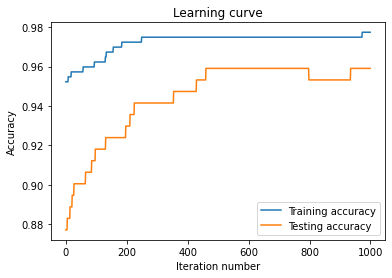

Confusion matrix:
Predicted  0.0  1.0
Actual             
0           59    4
1            3  105
Sensitivity: 0.9722222222222222
Specificity: 0.9365079365079365


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

# Normalize the data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Add a bias term to the input features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Define the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    grad = (1/m) * X.T.dot(h-y)
    return J, grad

# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = []
    accuracy_train_history = []
    accuracy_test_history = []
    for i in range(num_iterations):
        J, grad = cost_function(X, y, theta)
        theta = theta - alpha * grad
        J_history.append(J)
        accuracy_train = np.mean((sigmoid(X_train.dot(theta)) > 0.5) == y_train)
        accuracy_test = np.mean((sigmoid(X_test.dot(theta)) > 0.5) == y_test)
        accuracy_train_history.append(accuracy_train)
        accuracy_test_history.append(accuracy_test)
    return theta, J_history, accuracy_train_history, accuracy_test_history

# Initialize the parameter vector
theta = np.zeros(X_train.shape[1])

# Set the learning rate and number of iterations
alpha = 0.01
num_iterations = 1000

# Run gradient descent to optimize the parameter vector
theta, J_history, accuracy_train_history, accuracy_test_history = gradient_descent(X_train, y_train, theta, alpha, num_iterations)

# Plot the learning curve
fig, ax = plt.subplots()
ax.plot(range(num_iterations), accuracy_train_history, label='Training accuracy')
ax.plot(range(num_iterations), accuracy_test_history, label='Testing accuracy')
ax.set_xlabel('Iteration number')
ax.set_ylabel('Accuracy')
ax.set_title('Learning curve')
ax.legend()
plt.show()

# Evaluate the model on the testing set
y_pred = sigmoid(X_test.dot(theta))
y_pred_binary = np.round(y_pred)
confusion_matrix = pd.crosstab(y_test, y_pred_binary, rownames=['Actual'], colnames=['Predicted'])
print('Confusion matrix:')
print(confusion_matrix)
tn, fp, fn, tp = confusion_matrix.values.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
